In [1]:
import os
from pathlib import Path

while Path.cwd().name.lower() != "aiml25-exam" and "aiml25-exam" in str(Path.cwd()).lower():
    os.chdir("..")  # Move up one directory
print(f"Working directory set to: {Path.cwd()}")

Working directory set to: /Users/isimisi/Documents/GitHub/isimisi/AIML25-Exam


In [2]:
from src.yolo.yolo import Yolo
from ultralytics import YOLO
from src.utils.path import from_root

In [3]:
model = YOLO(from_root("models/yolo-trained.pt"))

yolo = Yolo(model)
yolo.predict(from_root("datasets/test/images/1.png"))


image 1/1 /Users/isimisi/Documents/GitHub/isimisi/AIML25-Exam/datasets/test/images/1.png: 448x640 14 sub-flows, 566.3ms
Speed: 2.3ms preprocess, 566.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'sub-flow'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 2

In [35]:
bboxes = yolo.getBBoxes()
images = yolo.cropImages(bboxes)

# images = images[:3]

print(len(images))

14


In [36]:
from src.edge_detector_llm import EdgeDetectorLLM
from decouple import config

WX_API_KEY = config("WX_API_KEY")
WX_PROJECT_ID = config("WX_PROJECT_ID")
WX_API_URL = "https://us-south.ml.cloud.ibm.com"

model = EdgeDetectorLLM(
    api_key=WX_API_KEY,
    project_id=WX_PROJECT_ID,
    api_url=WX_API_URL,
    model_id="watsonx/meta-llama/llama-3-2-90b-vision-instruct",  
    params={}
)

In [37]:
edges = []

for image in images:
    response = model.invoke(image, found_edges=edges)
    edges.extend(response.answer)

edges

[{'source': 'Main Group TopCo', 'target': 'GroupCo 3'},
 {'source': 'Main Group TopCo', 'target': 'GroupCo 4'},
 {'source': 'GroupCo 3', 'target': 'Co 3 Limited'},
 {'source': 'GroupCo 4', 'target': 'Co 4 Limited'},
 {'source': 'GroupCo 4', 'target': 'Co 5 Limited'},
 {'source': 'Co 6 Limited', 'target': 'Co 7 Limited'},
 {'source': 'Co 7 Limited', 'target': 'Co 11 Limited'},
 {'source': 'Co 11 Limited', 'target': 'Partnership'},
 {'source': 'Co 8 Limited', 'target': 'Co 9 Limited'},
 {'source': 'Co 9 Limited', 'target': 'Co 10 Limited'},
 {'source': 'GroupCo 1', 'target': 'Co 1 Limited'},
 {'source': 'GroupCo 2', 'target': 'Co 2 Limited'},
 {'source': 'GroupCo 3', 'target': 'Co 3 Limited'},
 {'source': 'GroupCo 4', 'target': 'Co 4 Limited'},
 {'source': 'GroupCo 4', 'target': 'Co 5 Limited'},
 {'source': 'Life Interest Trust 1', 'target': '60% (60,000 shares)'},
 {'source': 'Life Interest Trust 2', 'target': '40% (40,000 shares)'},
 {'source': 'Co 1 Limited', 'target': 'Co 6 Limited'}

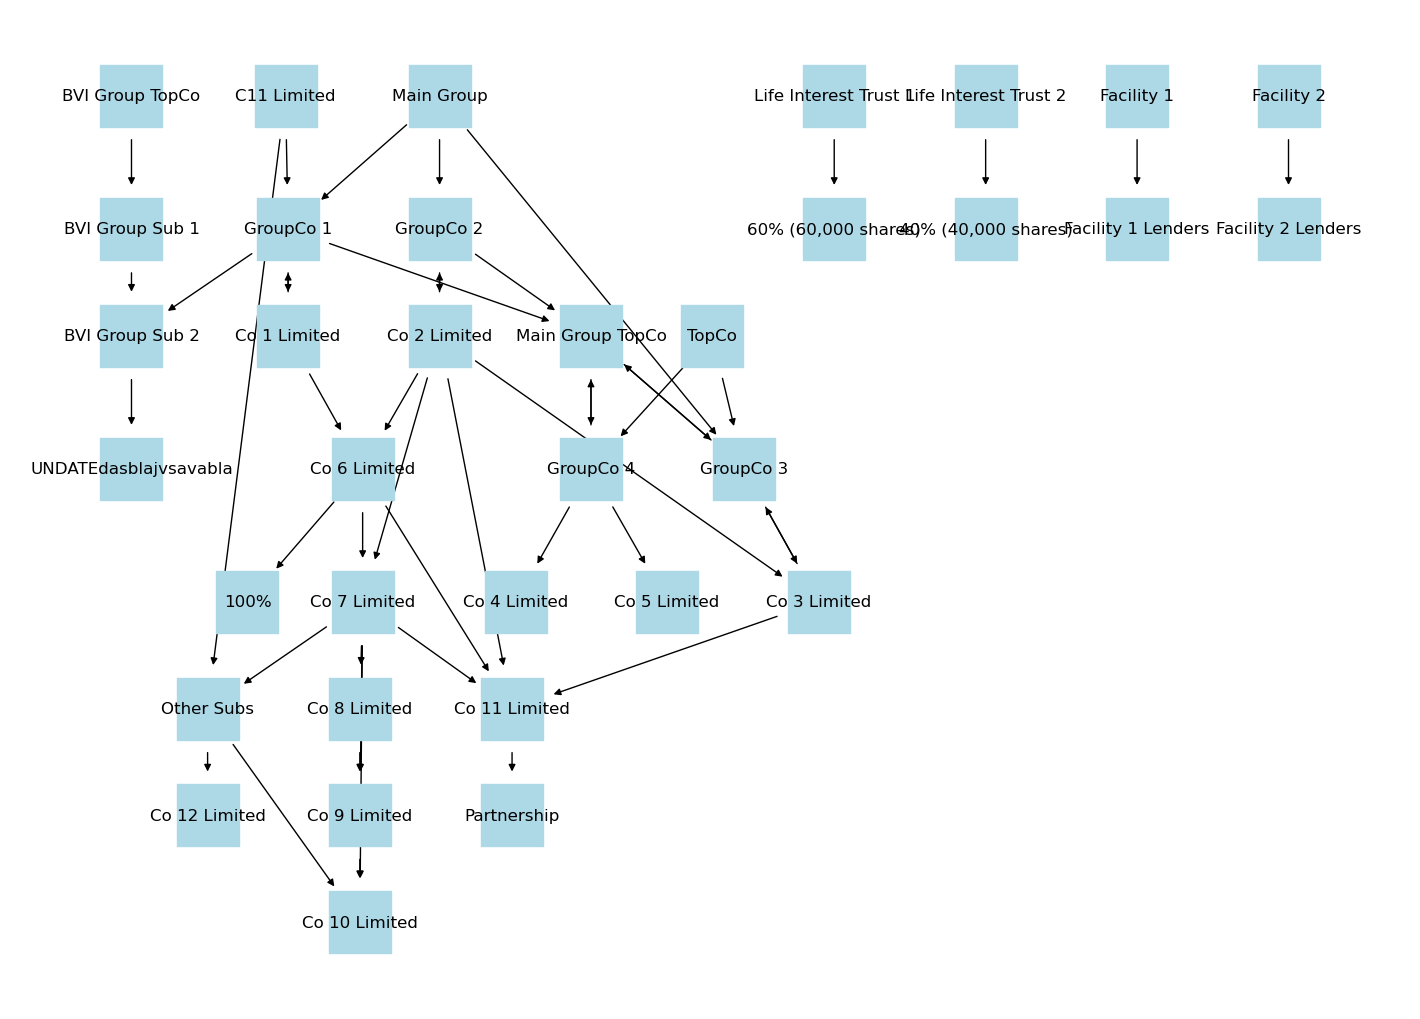

In [42]:
from src.graph_factory import GraphFactory
import matplotlib.pyplot as plt

factory = GraphFactory(edges)

graph = factory.create_graph()

plt.figure(figsize=(14, 10))
factory.plot_graph(graph).show()






In [19]:
for idx, image in enumerate(images):
    image.save(f"tmp/{idx}.png")

In [33]:
factory.edges

[{
   "id": "Facility 1 Lenders-Facility 1 \u00a34m",
   "source": "Facility 1 Lenders",
   "target": "Facility 1 \u00a34m"
 },
 {
   "id": "Facility 2 Lenders-Facility 2 \u00a32m",
   "source": "Facility 2 Lenders",
   "target": "Facility 2 \u00a32m"
 },
 {
   "id": "Facility 3 \u00a31m-Facility 2 Lenders",
   "source": "Facility 3 \u00a31m",
   "target": "Facility 2 Lenders"
 },
 {
   "id": "Facility 4 \u00a36m-Facility 3 \u00a31m",
   "source": "Facility 4 \u00a36m",
   "target": "Facility 3 \u00a31m"
 },
 {
   "id": "Co 1 Limited-Co 6 Limited",
   "source": "Co 1 Limited",
   "target": "Co 6 Limited"
 },
 {
   "id": "Co 2 Limited-Co 6 Limited",
   "source": "Co 2 Limited",
   "target": "Co 6 Limited"
 },
 {
   "id": "Co 3 Limited-Co 6 Limited",
   "source": "Co 3 Limited",
   "target": "Co 6 Limited"
 },
 {
   "id": "Co 6 Limited-Co 1 Limited",
   "source": "Co 6 Limited",
   "target": "Co 1 Limited"
 },
 {
   "id": "Co 6 Limited-Co 2 Limited",
   "source": "Co 6 Limited",
   "targ